In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
import sqlite3
import scipy.stats as stats


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import scipy.stats as stats
import time
from matplotlib.animation import FuncAnimation

def roll_dice():
    return np.mean(np.random.randint(1, 7, size=7))

connection = sqlite3.connect(':memory:')
c = connection.cursor()
c.execute("CREATE TABLE trial_means (Trial int, Mean real)")

try:
    for i in range(1, 1001):  # Perform 1000 trials
        mean = roll_dice()
        c.execute("INSERT INTO trial_means VALUES (?, ?)", (i, mean))
        connection.commit()
        time.sleep(0.5)  # Add a delay for animation
except KeyboardInterrupt:
    print("Execution interrupted by user.")
finally:
    connection.close()

def animate(i):
    query = "SELECT * FROM trial_means WHERE Trial <= {}".format(i)
    data = pd.read_sql_query(query, connection)
    x = data['Trial']
    y = data['Mean']

    plt.clf()
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    # Chart 1: Histogram of the means
    axs[0, 0].hist(y, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axs[0, 0].set_xlabel('Mean')
    axs[0, 0].set_ylabel('Frequency')
    axs[0, 0].set_title('Distribution of Trial Means ({} trials)'.format(i))
    axs[0, 0].text(0.5, 0.9, 'Number of trials: {}'.format(i), transform=axs[0, 0].transAxes)

    # Chart 2: QQ plot
    stats.probplot(y, dist="norm", plot=axs[0, 1])
    axs[0, 1].set_title('QQ Plot')

    # Chart 3: Shapiro-Wilk test results
    w, p_value = stats.shapiro(y)
    axs[0, 2].text(0.1, 0.5, 'Shapiro-Wilk Test Results:', fontsize=12, transform=axs[0, 2].transAxes)
    axs[0, 2].text(0.1, 0.4, 'W-statistic: {:.4f}'.format(w), fontsize=10, transform=axs[0, 2].transAxes)
    axs[0, 2].text(0.1, 0.3, 'p-value: {:.4f}'.format(p_value), fontsize=10, transform=axs[0, 2].transAxes)
    axs[0, 2].axis('off')  # Remove axis

    # Chart 4: Chart for p-values from Shapiro-Wilk test
    p_values = [stats.shapiro(data['Mean'][:j])[1] for j in range(1, i+1)]
    axs[1, 0].plot(range(1, i+1), p_values)
    axs[1, 0].set_xlabel('Trials')
    axs[1, 0].set_ylabel('p-value')
    axs[1, 0].set_title('p-values from Shapiro-Wilk Test')

    # Chart 5: Original distribution
    axs[1, 1].hist(data['Mean'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axs[1, 1].set_xlabel('Mean')
    axs[1, 1].set_ylabel('Frequency')
    axs[1, 1].set_title('Original Distribution')

    plt.tight_layout()

ani = FuncAnimation(plt.gcf(), animate, interval=500)
plt.show()


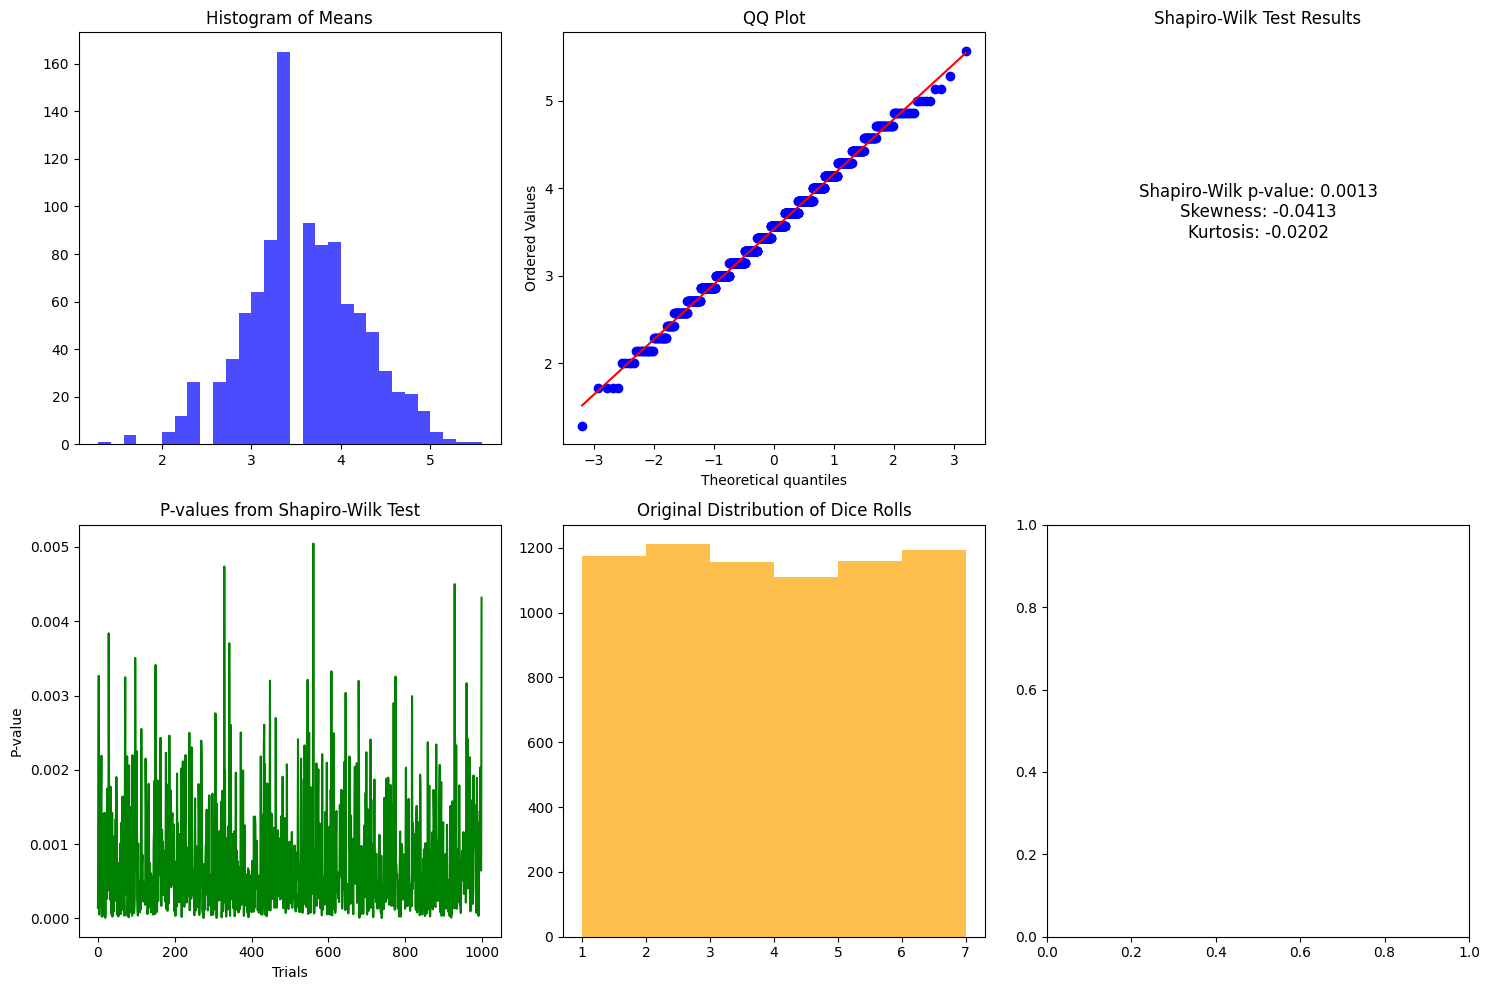

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def roll_dice(num_trials):
    return np.mean(np.random.randint(1, 7, size=(num_trials, 7)), axis=1)
num_trials = 1000
dice_means = roll_dice(num_trials)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Chart 1: Histogram of the means
axs[0, 0].hist(dice_means, bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram of Means')

# Chart 2: QQ plot
stats.probplot(dice_means, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('QQ Plot')

# Chart 3: Shapiro-Wilk test results
shapiro_stat, shapiro_pval = stats.shapiro(dice_means)
skewness = stats.skew(dice_means)
kurtosis = stats.kurtosis(dice_means)
axs[0, 2].text(0.5, 0.5, f'Shapiro-Wilk p-value: {shapiro_pval:.4f}\nSkewness: {skewness:.4f}\nKurtosis: {kurtosis:.4f}',
               fontsize=12, ha='center')
axs[0, 2].axis('off')
axs[0, 2].set_title('Shapiro-Wilk Test Results')

# Chart 4: P-values from Shapiro-Wilk test
p_values = np.array([stats.shapiro(roll_dice(num_trials))[1] for _ in range(1000)])
axs[1, 0].plot(p_values, color='green')
axs[1, 0].set_title('P-values from Shapiro-Wilk Test')
axs[1, 0].set_xlabel('Trials')
axs[1, 0].set_ylabel('P-value')

# Chart 5: Original distribution of dice rolls
original_distribution = np.random.randint(1, 7, size=num_trials*7)
axs[1, 1].hist(original_distribution, bins=range(1, 8), color='orange', alpha=0.7)
axs[1, 1].set_title('Original Distribution of Dice Rolls')

plt.tight_layout()

plt.show()


In [2]:
from scipy.stats import probplot, shapiro, skew, kurtosis
%matplotlib notebook

<IPython.core.display.Javascript object>


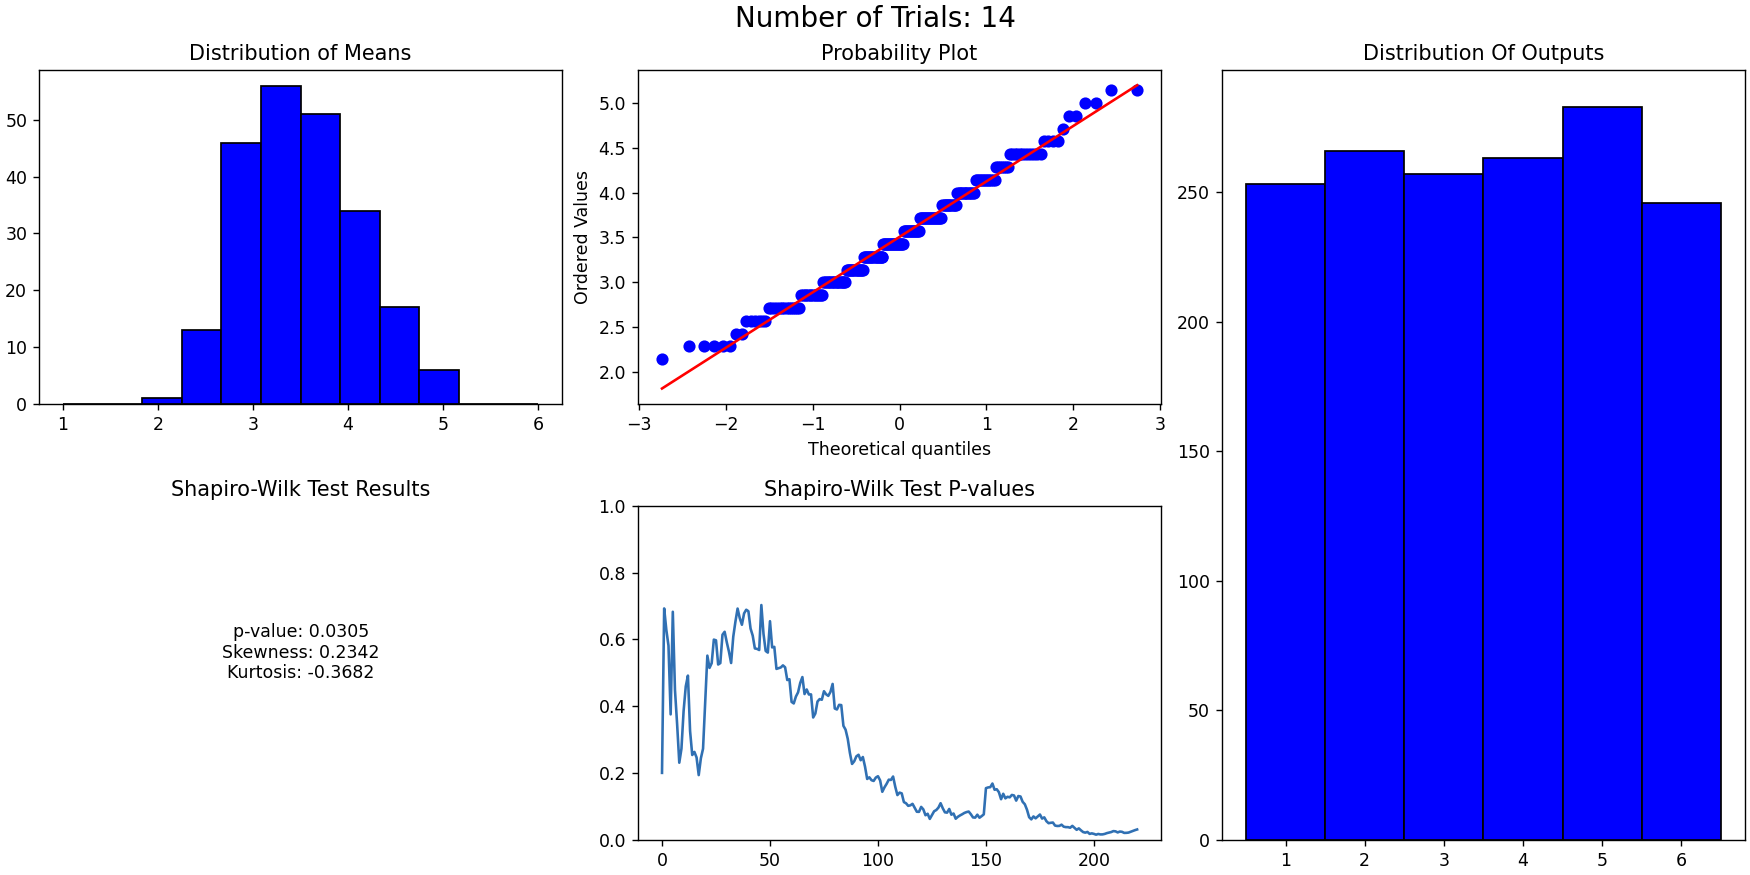

In [3]:
num_rolls = 7
num_trials = 200

means = []
p_values = []
all_rolls = []

hist_color = '#3070b3'
line_color = '#3070b3'
font_size = 10
title_font_size = 12
common_kwargs = {'color': hist_color, 'edgecolor': 'black'}

fig = plt.figure(constrained_layout=True, figsize=(14, 7))
grid = fig.add_gridspec(2, 3)

ax_hist = fig.add_subplot(grid[0, 0])
ax_qq = fig.add_subplot(grid[0, 1])
ax_sw_p_value_text = fig.add_subplot(grid[1, 0])
ax_sw_p_value_line = fig.add_subplot(grid[1, 1])
ax_orig_dist = fig.add_subplot(grid[:, 2])

def init():
    ax_hist.set_title('Distribution of Means', fontsize=title_font_size)
    ax_qq.set_title('Probability Plot', fontsize=title_font_size)
    ax_sw_p_value_line.set_title('Shapiro-Wilk Test P-values', fontsize=title_font_size)
    ax_sw_p_value_line.set_ylim(0, 1)
    ax_orig_dist.set_title('Original Distribution', fontsize=title_font_size)
    ax_orig_dist.set_xticks(range(1, 7))

    ax_sw_p_value_text.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    for spine in ax_sw_p_value_text.spines.values():
        spine.set_visible(False)

def update(frame):
    rolls = np.random.randint(1, 7, size=num_rolls)
    all_rolls.extend(rolls)
    mean = np.mean(rolls)
    means.append(mean)

    ax_hist.clear()
    ax_hist.hist(means, bins=np.linspace(1, 6, 13), **common_kwargs)
    ax_hist.set_title('Distribution of Means', fontsize=title_font_size)

    ax_qq.clear()
    probplot(means, dist='norm', plot=ax_qq)
    ax_qq.set_title('Probability Plot', fontsize=title_font_size)

    ax_orig_dist.clear()
    ax_orig_dist.hist(all_rolls, bins=np.arange(0.5, 7.5, 1), **common_kwargs)
    ax_orig_dist.set_title('Distribution Of Outputs', fontsize=title_font_size)
    ax_orig_dist.set_xticks(range(1, 7))

    if len(means) > 3:
        sw_test_result = shapiro(means)
        p_value = sw_test_result[1]
        p_values.append(p_value)
        ax_sw_p_value_line.clear()
        ax_sw_p_value_line.plot(p_values, color=line_color)
        ax_sw_p_value_line.set_title('Shapiro-Wilk Test P-values', fontsize=title_font_size)
        ax_sw_p_value_line.set_ylim(0, 1)

        ax_sw_p_value_text.clear()
        ax_sw_p_value_text.set_title('Shapiro-Wilk Test Results', fontsize=title_font_size)
        ax_sw_p_value_text.text(0.5, 0.65, f'p-value: {p_value:.4f}\nSkewness: {skew(means):.4f}\nKurtosis: {kurtosis(means):.4f}',
                                ha='center', va='top', fontsize=font_size,
                                transform=ax_sw_p_value_text.transAxes)

    fig.suptitle(f'Number of Trials: {frame+1}', fontsize=16)

ani = FuncAnimation(fig, update, frames=num_trials, init_func=init, interval=500, repeat=False)

plt.show()

<IPython.core.display.Javascript object>


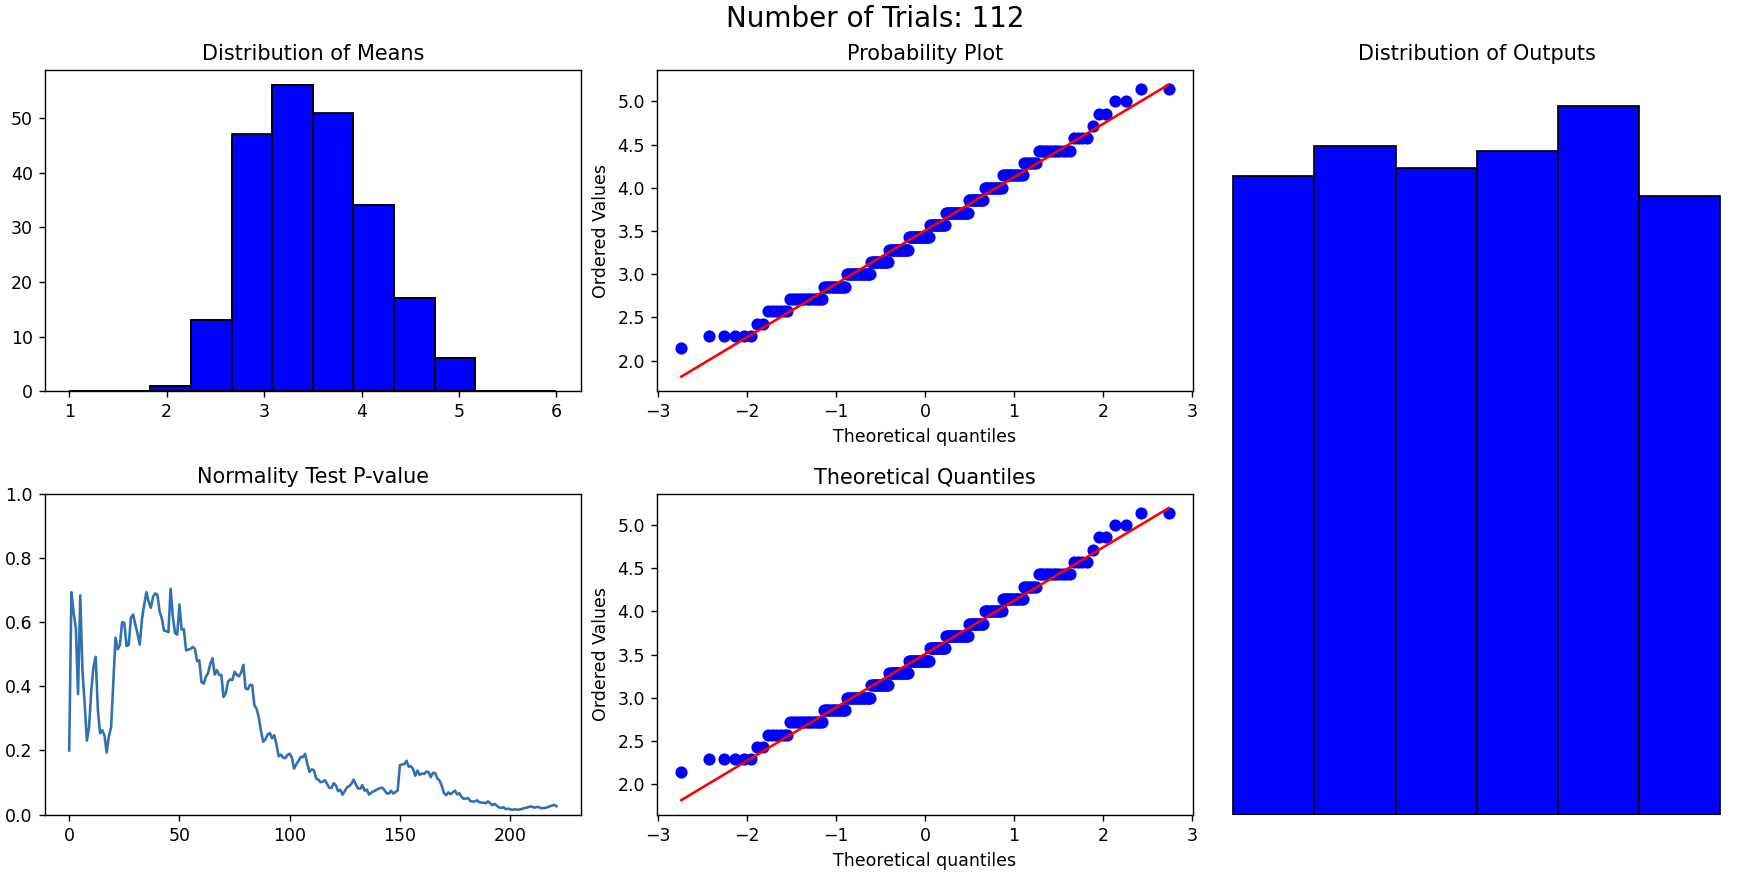

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, shapiro, skew, kurtosis
from matplotlib.animation import FuncAnimation

num_rolls = 7
num_trials = 200

means = []
p_values = []
all_rolls = []

hist_color = 'blue'
line_color = '#3070b3'
font_size = 10
title_font_size = 12
common_kwargs = {'color': hist_color, 'edgecolor': 'black'}

fig = plt.figure(constrained_layout=True, figsize=(14, 7))
grid = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[0:2, 2])
ax4 = fig.add_subplot(grid[1, 0])
ax5 = fig.add_subplot(grid[1, 1])

def init():
    ax1.set_title('Distribution of Means', fontsize=title_font_size)
    ax2.set_title('Probability Plot', fontsize=title_font_size)
    ax3.set_title('Distribution of Outputs', fontsize=title_font_size)
    ax4.set_title('Normality Test P-value', fontsize=title_font_size)
    ax5.set_title('Theoretical Quantiles', fontsize=title_font_size)
    ax3.set_ylim(0, 1)
    ax3.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    for spine in ax3.spines.values():
        spine.set_visible(False)

def update(frame):
    rolls = np.random.randint(1, 7, size=num_rolls)
    all_rolls.extend(rolls)
    mean = np.mean(rolls)
    means.append(mean)

    ax1.hist(means, bins=np.linspace(1, 6, 13), **common_kwargs)
    ax1.set_title('Distribution of Means', fontsize=title_font_size)

    ax2.clear()
    probplot(means, dist='norm', plot=ax2)
    ax2.set_title('Probability Plot', fontsize=title_font_size)

    ax3.clear()
    ax3.hist(all_rolls, bins=np.arange(0.5, 7.5, 1), **common_kwargs)
    ax3.set_title('Distribution of Outputs', fontsize=title_font_size)
    ax3.set_xticks(range(1, 7))

    if len(means) > 3:
        sw_test_result = shapiro(means)
        p_value = sw_test_result[1]
        p_values.append(p_value)
        ax4.clear()
        ax4.plot(p_values, color=line_color)
        ax4.set_title('Normality Test P-value', fontsize=title_font_size)
        ax4.set_ylim(0, 1)

        ax5.clear()
        probplot(means, dist='norm', plot=ax5)
        ax5.set_title('Theoretical Quantiles', fontsize=title_font_size)

    fig.suptitle(f'Number of Trials: {frame+1}', fontsize=16)

ani = FuncAnimation(fig, update, frames=num_trials, init_func=init, interval=500, repeat=False)

plt.show()
